In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")


# Load data set

Data are from the Census Bureau’s American Community Survey

In [2]:
edgap = pd.read_excel(
    'https://github.com/brian-fischer/DATA-5100/raw/main/EdGap_data.xlsx',
    dtype={'NCESSCH School ID': object}
)

/opt/anaconda3/lib/python3.13/site-packages/openpyxl/worksheet/_read_only.py:85: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


### Data Path Setup
Before running the script, update the CSV file path:
```python
school_information = pd.read_csv("/path/to/your/local/folder/ccd_sch_029_1617_w_1a_11212017.csv")
financial_data = pd.read_excel("/path/to/your/local/folder/Stfis170_1a.xlsx")

Data from the National Center for Education Statistics

In [3]:
school_information = pd.read_csv(
    "/Users/vincent/Documents/MSDS/DATA 5100/education/data/ccd_sch_029_1617_w_1a_11212017.csv", encoding = "unicode_escape"
)

/var/folders/c_/xvyl08rd0w152pky7b5zssvw0000gn/T/ipykernel_51644/4193124254.py:1: DtypeWarning: Columns (6,9,14,15,18,19,21,22,25,26,29,31,35,39,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  school_information = pd.read_csv(


In [4]:
financial_data = pd.read_excel(
    '/Users/vincent/Documents/MSDS/DATA 5100/education/data/Stfis170_1a.xlsx'
)

# Explore the contents of the data sets

In [5]:
edgap.head()

,NCESSCH School ID,CT Unemployment Rate,CT Pct Adults with College Degree,CT Pct Childre In Married Couple Family,CT Median Household Income,School ACT average (or equivalent if SAT score),School Pct Free and Reduced Lunch
0,100001600143,0.117962,0.445283,0.346495,42820.0,20.433455,0.066901
1,100008000024,0.063984,0.662765,0.767619,89320.0,19.498168,0.112412
2,100008000225,0.056460,0.701864,0.713090,84140.0,19.554335,0.096816
3,100017000029,0.044739,0.692062,0.641283,56500.0,17.737485,0.296960
4,100018000040,0.077014,0.640060,0.834402,54015.0,18.245421,0.262641


In [6]:
financial_data.head()

,SURVYEAR,FIPS,STABR,STNAME,R1A,R1B,R1C,R1D,R1E,R1F,...,X12F,TX12,NCE13,ADA,A14A,A14B,PPE15,MEMBR16,CE1,CE2
0,2017,1,AL,Alabama,-2,-2,1223602260,656494717,6968065,778998,...,0,555200871,6542270868,698495,-2,698495,9366,744930,5596210657,946060211
1,2017,2,AK,Alaska,-2,-2,319888901,176112023,244625,36799,...,0,65747372,2301959994,121110,121110,-2,19007,132737,2162374341,205333025
2,2017,4,AZ,Arizona,3182392621,-2,-2,67114442,8097583,18033838,...,0,536992522,8429691730,1011247,1011247,-2,8336,1113433,7484405723,945286010
3,2017,5,AR,Arkansas,1782061097,1049177,-2,6746863,11269463,5918257,...,0,317323006,4619141614,450084,-2,450084,10263,493447,4314761517,385439314
4,2017,6,CA,California,24101039402,1079461463,168400,-2,2428494,440913569,...,0,2253991683,74409739743,6022259,6022259,-2,12356,6309138,70250684049,6413047378


In [7]:
pd.set_option('display.max_columns', None)
school_information.head()

,SCHOOL_YEAR,FIPST,STATENAME,ST,SCH_NAME,LEA_NAME,STATE_AGENCY_NO,UNION,ST_LEAID,LEAID,ST_SCHID,NCESSCH,SCHID,MSTREET1,MSTREET2,MSTREET3,MCITY,MSTATE,MZIP,MZIP4,LSTREET1,LSTREET2,LSTREET3,LCITY,LSTATE,LZIP,LZIP4,PHONE,WEBSITE,SY_STATUS,SY_STATUS_TEXT,UPDATED_STATUS,UPDATED_STATUS_TEXT,EFFECTIVE_DATE,SCH_TYPE_TEXT,SCH_TYPE,RECON_STATUS,OUT_OF_STATE_FLAG,CHARTER_TEXT,CHARTAUTH1,CHARTAUTHN1,CHARTAUTH2,CHARTAUTHN2,NOGRADES,G_PK_OFFERED,G_KG_OFFERED,G_1_OFFERED,G_2_OFFERED,G_3_OFFERED,G_4_OFFERED,G_5_OFFERED,G_6_OFFERED,G_7_OFFERED,G_8_OFFERED,G_9_OFFERED,G_10_OFFERED,G_11_OFFERED,G_12_OFFERED,G_13_OFFERED,G_UG_OFFERED,G_AE_OFFERED,GSLO,GSHI,LEVEL,IGOFFERED
0,2016-2017,1,ALABAMA,AL,Sequoyah Sch - Chalkville Campus,Alabama Youth Services,1,NaN,AL-210,100002,AL-210-0020,1.000020e+10,100277.0,P O Box 9486,NaN,NaN,Birmingham,AL,35220,NaN,1000 Industrial School Road,NaN,NaN,Birmingham,AL,35220,NaN,(205)680-8574,http://www.dys.alabama.gov,1,Open,1,Open,03/03/2010,Alternative School,4,No,No,No,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,07,12,High,As reported
1,2016-2017,1,ALABAMA,AL,Camps,Alabama Youth Services,1,NaN,AL-210,100002,AL-210-0050,1.000020e+10,101667.0,P O Box 66,NaN,NaN,Mt Meigs,AL,36057,NaN,1601 County Rd. 57,NaN,NaN,Prattville,AL,36067,NaN,(334)215-3850,http://www.dys.alabama.gov,1,Open,1,Open,03/03/2010,Alternative School,4,No,No,No,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,07,12,High,As reported
2,2016-2017,1,ALABAMA,AL,Det Ctr,Alabama Youth Services,1,NaN,AL-210,100002,AL-210-0060,1.000020e+10,101670.0,P O Box 66,NaN,NaN,Mt Meigs,AL,36057,NaN,2109 Bashi Rd Bldg 509,NaN,NaN,Thomasville,AL,36784,NaN,(334)215-3850,http://www.dys.alabama.gov,1,Open,1,Open,03/03/2010,Alternative School,4,No,No,No,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,07,12,High,As reported
3,2016-2017,1,ALABAMA,AL,Wallace Sch - Mt Meigs Campus,Alabama Youth Services,1,NaN,AL-210,100002,AL-210-0030,1.000020e+10,101705.0,P O Box 66,NaN,NaN,Mount Meigs,AL,36057,NaN,1000 Industrial School Road,NaN,NaN,Mount Meigs,AL,36057,NaN,(334)215-6039,http://www.dys.alabama.gov,1,Open,1,Open,03/03/2010,Alternative School,4,No,No,No,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,07,12,High,As reported
4,2016-2017,1,ALABAMA,AL,McNeel Sch - Vacca Campus,Alabama Youth Services,1,NaN,AL-210,100002,AL-210-0040,1.000020e+10,101706.0,8950 Roebuck Blvd,NaN,NaN,Birmingham,AL,35206,NaN,8950 Roebuck Blvd,NaN,NaN,Birmingham,AL,35206,NaN,(205)838-4981,http://www.dys.alabama.gov,1,Open,1,Open,03/03/2010,Alternative School,4,No,No,No,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,07,12,High,As reported


In [8]:
edgap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7986 entries, 0 to 7985
Data columns (total 7 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   NCESSCH School ID                                7986 non-null   object 
 1   CT Unemployment Rate                             7972 non-null   float64
 2   CT Pct Adults with College Degree                7973 non-null   float64
 3   CT Pct Childre In Married Couple Family          7961 non-null   float64
 4   CT Median Household Income                       7966 non-null   float64
 5   School ACT average (or equivalent if SAT score)  7986 non-null   float64
 6   School Pct Free and Reduced Lunch                7986 non-null   float64
dtypes: float64(6), object(1)
memory usage: 436.9+ KB


The edgap dataset contains 7986 rows and 7 columns, with a few missing values in some socioeconomic fields

In [9]:
school_information.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102183 entries, 0 to 102182
Data columns (total 65 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SCHOOL_YEAR          102183 non-null  object 
 1   FIPST                102183 non-null  int64  
 2   STATENAME            102183 non-null  object 
 3   ST                   102183 non-null  object 
 4   SCH_NAME             102183 non-null  object 
 5   LEA_NAME             102183 non-null  object 
 6   STATE_AGENCY_NO      102183 non-null  object 
 7   UNION                2533 non-null    float64
 8   ST_LEAID             102183 non-null  object 
 9   LEAID                102183 non-null  object 
 10  ST_SCHID             102183 non-null  object 
 11  NCESSCH              102181 non-null  float64
 12  SCHID                102181 non-null  float64
 13  MSTREET1             102181 non-null  object 
 14  MSTREET2             1825 non-null    object 
 15  MSTREET3         

The school information data set contains 102183 rows and 65 columns. Most columns represent identifiers, names, locations, and school characteristics

In [10]:
financial_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Columns: 154 entries, SURVYEAR to CE2
dtypes: int64(152), object(2)
memory usage: 67.5+ KB


# Are the data suitable for answering the question?


Make a pair plot with regression lines to explore relationships between the variables.

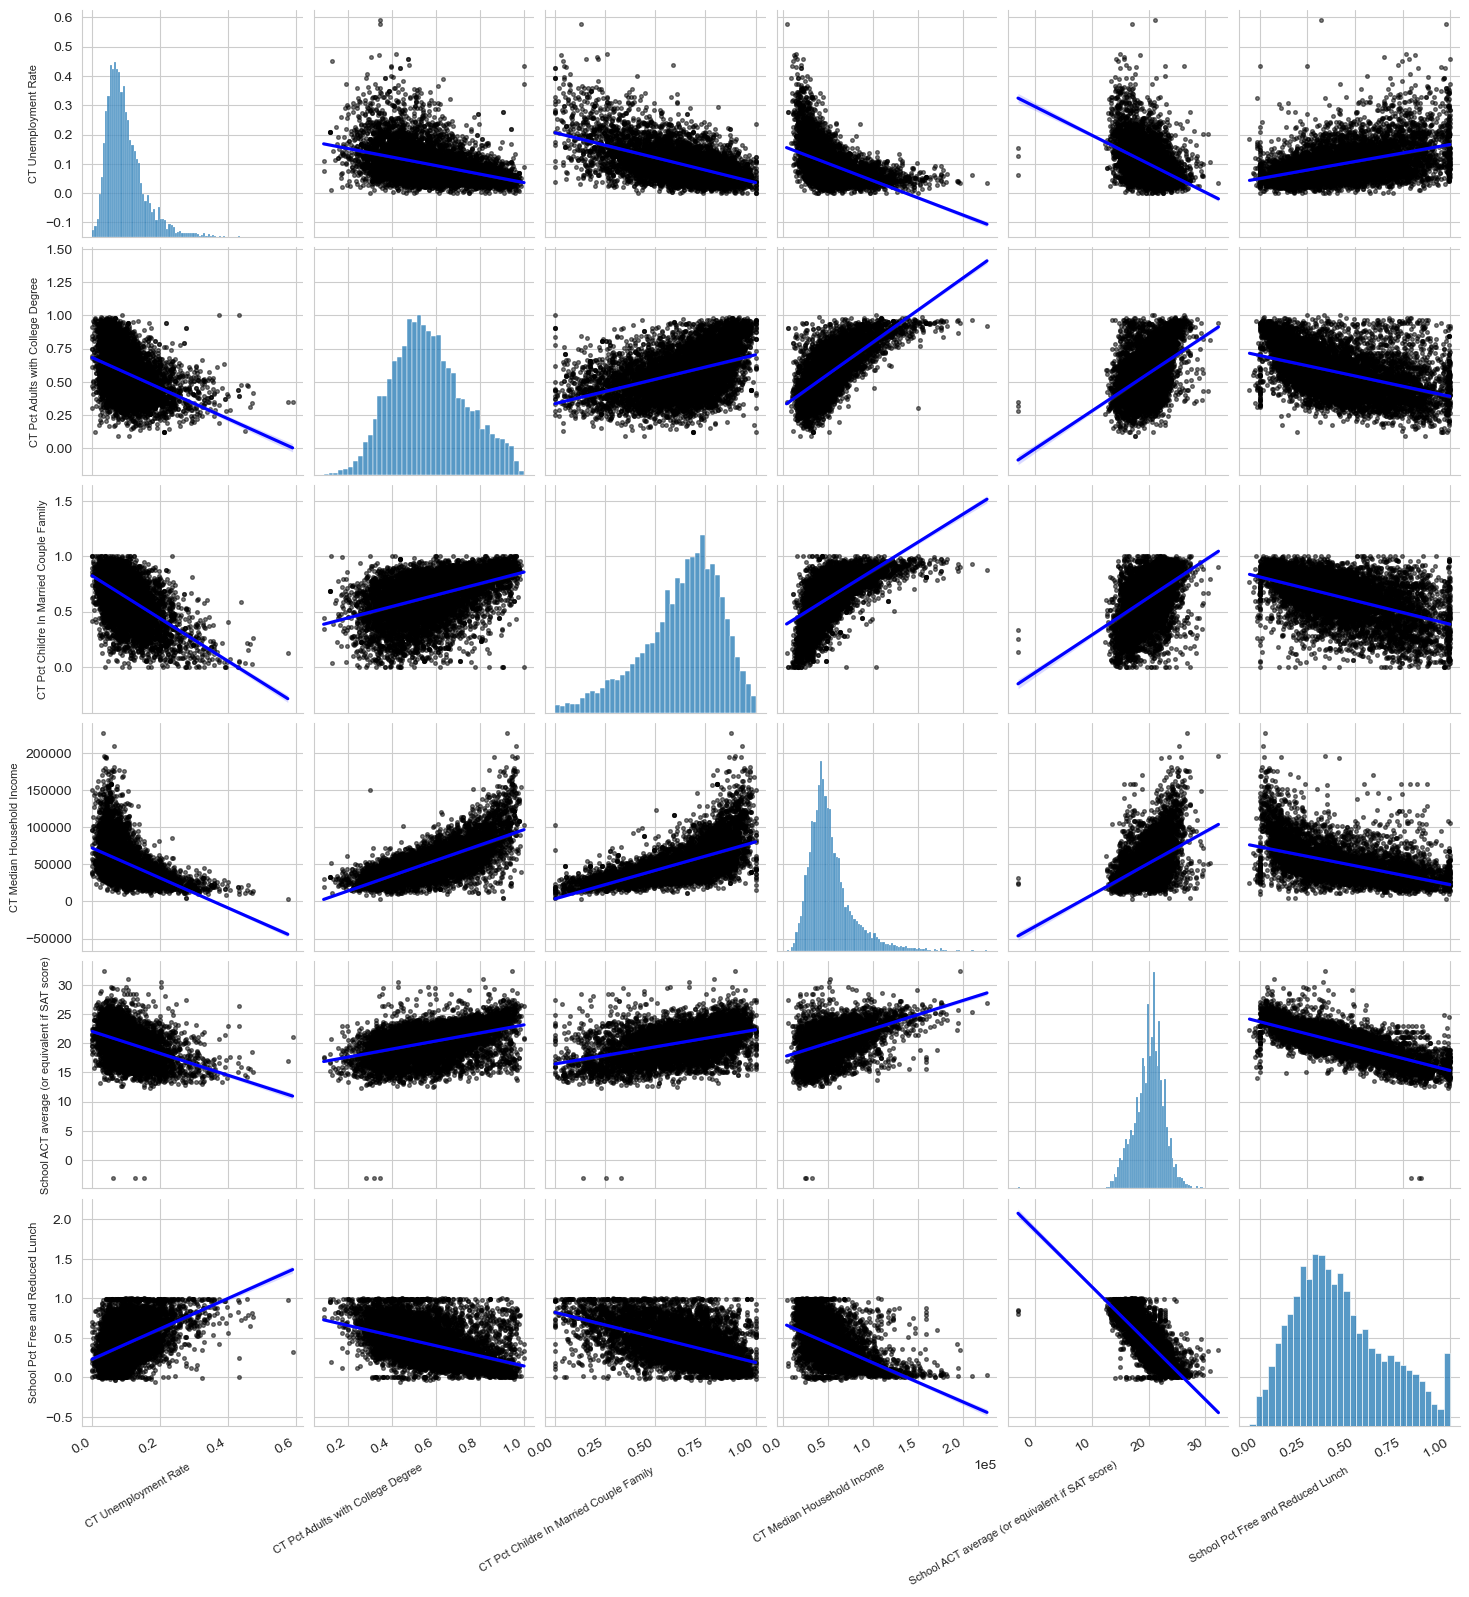

In [11]:
fig = sns.pairplot(
    edgap.drop(columns = "NCESSCH School ID"),
    kind="reg",
    plot_kws={
        "line_kws": {"color": "blue"},
        "scatter_kws": {"alpha": 0.5, "color": "k", "s": 7},
    }
)

for ax in fig.axes.flat:
    if ax.get_xlabel () == 'CT Median Household Income':
        ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0)) #apply scientific notation to x-axis only for Median Household Income
    ax.set_xlabel(ax.get_xlabel(), fontsize=8, rotation = 30, ha = 'right')
    ax.set_ylabel(ax.get_ylabel(), fontsize=8)

    # Rotate x-axis tick labels
    plt.setp(ax.get_xticklabels(), rotation = 30, ha = 'right')

plt.show()

This pair plot shows the relationships between socioeconomic factors and average ACT scores, with regression lines to highlight trends. Higher unemployment rates are generally linked with lower ACT averages, while regions with more adults holding college degrees and higher median household incomes tend to have higher ACT scores. The percentage of students receiving free or reduced lunch shows a negative relationship with ACT averages, reinforcing the connection between poverty and lower academic performance. Income and education level also rise together, while both drop as unemployment and poverty increase. Overall, these regression trends confirm that socioeconomic conditions are important predictors of student outcomes.

# Data Preparation

Selecting only the columns relevant for identifying and catergorizing schools

In [12]:
school_information = school_information[
    ['SCHOOL_YEAR', 'NCESSCH', 'LSTATE', 'LZIP', 'SCH_TYPE_TEXT', 'LEVEL', 'CHARTER_TEXT']
]
school_information.head()

,SCHOOL_YEAR,NCESSCH,LSTATE,LZIP,SCH_TYPE_TEXT,LEVEL,CHARTER_TEXT
0,2016-2017,1.000020e+10,AL,35220,Alternative School,High,No
1,2016-2017,1.000020e+10,AL,36067,Alternative School,High,No
2,2016-2017,1.000020e+10,AL,36784,Alternative School,High,No
3,2016-2017,1.000020e+10,AL,36057,Alternative School,High,No
4,2016-2017,1.000020e+10,AL,35206,Alternative School,High,No


Selecting only the state and their total revenue

In [13]:
financial_data = financial_data[
    ['STABR', "TR"]
]
financial_data.head()

,STABR,TR
0,AL,7889119742
1,AK,2508280676
2,AZ,10259495925
3,AR,5619331739
4,CA,88108864103


# Rename columns

In [14]:
edgap = edgap.rename(
    columns={
        'NCESSCH School ID': 'id',
        'CT Pct Adults with College Degree': 'percent_college',
        'CT Unemployment Rate': 'rate_unemployment',
        'CT Pct Childre In Married Couple Family': 'percent_married',
        'CT Median Household Income': 'median_income',
        'School ACT average (or equivalent if SAT score)': 'average_act',
        'School Pct Free and Reduced Lunch': 'percent_lunch'
    }
)


In [15]:
school_information = school_information.rename(
    columns = {
        'SCHOOL_YEAR': 'year',
        'NCESSCH': 'id',
        'LSTATE': 'state',
        'LZIP': 'zip_code',
        'SCH_TYPE_TEXT': 'school_type',
        'LEVEL': 'school_level',
        'CHARTER_TEXT': 'charter'
    }
)

In [16]:
financial_data = financial_data.rename(
    columns = {
        'STABR': 'state',
        'TR': 'state_total_revenue'
    }
)

In [17]:
school_information.head()


,year,id,state,zip_code,school_type,school_level,charter
0,2016-2017,1.000020e+10,AL,35220,Alternative School,High,No
1,2016-2017,1.000020e+10,AL,36067,Alternative School,High,No
2,2016-2017,1.000020e+10,AL,36784,Alternative School,High,No
3,2016-2017,1.000020e+10,AL,36057,Alternative School,High,No
4,2016-2017,1.000020e+10,AL,35206,Alternative School,High,No


In [18]:
edgap.head()

,id,rate_unemployment,percent_college,percent_married,median_income,average_act,percent_lunch
0,100001600143,0.117962,0.445283,0.346495,42820.0,20.433455,0.066901
1,100008000024,0.063984,0.662765,0.767619,89320.0,19.498168,0.112412
2,100008000225,0.056460,0.701864,0.713090,84140.0,19.554335,0.096816
3,100017000029,0.044739,0.692062,0.641283,56500.0,17.737485,0.296960
4,100018000040,0.077014,0.640060,0.834402,54015.0,18.245421,0.262641


In [19]:
financial_data.head()

,state,state_total_revenue
0,AL,7889119742
1,AK,2508280676
2,AZ,10259495925
3,AR,5619331739
4,CA,88108864103


# Join data frames


In [20]:
school_information['id'] = school_information['id'].astype(object)

In [21]:
df = edgap.merge(
    school_information,
    how = 'left',
    on = 'id'

)

In [22]:
df = df.merge(
    financial_data,
    how = 'left',
    on = 'state'
)

This code chunk uses a left join to combine the datasets. First, it merges the edgap data with school_information using the shared 'id' column, then adds in financial_data based on the 'state' column. A left join keeps all the records from the main dataset (edgap), even if some schools don’t have matching information in the other tables. This way, no schools are dropped from the analysis, but any extra details from the other datasets are added wherever they match.

In [23]:
df.head()

,id,rate_unemployment,percent_college,percent_married,median_income,average_act,percent_lunch,year,state,zip_code,school_type,school_level,charter,state_total_revenue
0,100001600143,0.117962,0.445283,0.346495,42820.0,20.433455,0.066901,2016-2017,DE,19804,Regular School,High,Yes,2.729986e+09
1,100008000024,0.063984,0.662765,0.767619,89320.0,19.498168,0.112412,2016-2017,DE,19709,Regular School,High,No,2.729986e+09
2,100008000225,0.056460,0.701864,0.713090,84140.0,19.554335,0.096816,2016-2017,DE,19709,Regular School,High,No,2.729986e+09
3,100017000029,0.044739,0.692062,0.641283,56500.0,17.737485,0.296960,2016-2017,DE,19958,Regular School,High,No,2.729986e+09
4,100018000040,0.077014,0.640060,0.834402,54015.0,18.245421,0.262641,2016-2017,DE,19934,Regular School,High,No,2.729986e+09


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7986 entries, 0 to 7985
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   7986 non-null   object 
 1   rate_unemployment    7972 non-null   float64
 2   percent_college      7973 non-null   float64
 3   percent_married      7961 non-null   float64
 4   median_income        7966 non-null   float64
 5   average_act          7986 non-null   float64
 6   percent_lunch        7986 non-null   float64
 7   year                 7898 non-null   object 
 8   state                7898 non-null   object 
 9   zip_code             7898 non-null   object 
 10  school_type          7898 non-null   object 
 11  school_level         7898 non-null   object 
 12  charter              7898 non-null   object 
 13  state_total_revenue  7898 non-null   float64
dtypes: float64(7), object(7)
memory usage: 873.6+ KB


# Quality Control

In [25]:
df.select_dtypes(include = ['number']).agg(['min', 'max']).round(2)

,rate_unemployment,percent_college,percent_married,median_income,average_act,percent_lunch,state_total_revenue
min,0.00,0.09,0.0,3589.0,-3.07,-0.05,1.931277e+09
max,0.59,1.00,1.0,226181.0,32.36,1.00,6.922823e+10


Set out of range values to NaN using np.nan

In [26]:
df.loc[df['average_act'] < 1, 'average_act'] = np.nan

In [27]:
df.loc[df['percent_lunch'] < 0, 'percent_lunch'] = np.nan


First, the code looks at the minimum and maximum values of all numeric columns to spot anything unrealistic, like negative percentages or extremely low ACT scores. After identifying those problems, the next lines replace any invalid numbers with NaN using np.nan. For example, ACT scores below 1 or lunch percentages below 0 are marked as missing. This step helps keep the dataset accurate and ready for analysis without letting incorrect values affect the results.

Check the types, levels, and charter status of school

In [28]:
df['school_level'].value_counts()

school_level
High            7230
Other            631
Not reported      35
Elementary         2
Name: count, dtype: int64

In [29]:
df['school_type'].value_counts()

school_type
Regular School                 7885
Alternative School               10
Special Education School          2
Career and Technical School       1
Name: count, dtype: int64

In [30]:
df['charter'].value_counts()

charter
No                7329
Yes                352
Not applicable     217
Name: count, dtype: int64

Keep only the high schools

In [31]:
df = df.loc[df['school_level'] == 'High']

check for any duplicated rows

In [32]:
df.duplicated().sum()

np.int64(0)

# Identify missing values

Values of each variable that are missing

In [33]:
df.isna().sum().to_frame(name = 'Number of Missing Values')

,Number of Missing Values
id,0
rate_unemployment,12
percent_college,11
percent_married,20
median_income,16
average_act,3
percent_lunch,20
year,0
state,0
zip_code,0


Looking at states that we have data from

In [34]:
df['state'].value_counts()  

state
TX    913
OH    654
IL    564
PA    543
MI    498
NC    407
FL    404
GA    367
WI    351
NJ    341
MO    337
IN    321
NY    295
TN    265
WA    263
MA    253
KY    198
LA    194
WY     38
DE     24
Name: count, dtype: int64

In [35]:
df['state'].nunique()

20

Only data from 20 states are included in the dataset.

Plot the results on a map

In [36]:
import plotly.offline as po
import plotly.graph_objs as pg

In [37]:
layout = dict(
    geo={"scope": 'usa'}, coloraxis_colorbar = dict(title = 'Number of Schools')
)

data = dict(
    type = 'choropleth',
    locations = df['state'].value_counts().index,
    locationmode = 'USA-states',
    coloraxis = 'coloraxis',
    z = df['state'].value_counts().values,
    
)

x = pg.Figure(data = [data], layout = layout)
po.iplot(x)

This map shows how many schools are included in the dataset for each state. The brighter colors represent states with more schools, while the darker ones have fewer. Only 20 states are shown, and Texas clearly has the largest number of schools in the data.

Drop the rows where the average ACT score is missing

In [38]:
df = df.dropna(subset = ['average_act'])

In [39]:
df.isna().sum().to_frame(name = 'Number of Missing Values')

,Number of Missing Values
id,0
rate_unemployment,12
percent_college,11
percent_married,20
median_income,16
average_act,0
percent_lunch,20
year,0
state,0
zip_code,0


# Data imputation

In [40]:
predictor_variables = [
    'rate_unemployment',
    'percent_college',
    'percent_married',
    'median_income',
    'percent_lunch',
    'state',
    'charter'
]

Use the iterative imputer to replace missing values in the columns corresponding to opredictor variables in the analysis

In [41]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [42]:
imputer = IterativeImputer()

Define the columns you want to use in the imputation process

In [43]:
numerical_predictors = df[predictor_variables].select_dtypes(include = ['number']).columns.to_list()
print(numerical_predictors)

['rate_unemployment', 'percent_college', 'percent_married', 'median_income', 'percent_lunch']


Fit the Iterative Imputer model to the dataset using the selected numerical predictor columns. This step allows the imputer to learn the relationships between variables so it can estimate missing values

In [44]:
imputer.fit(df.loc[:, numerical_predictors])

IterativeImputer()

Apply the trained imputer to fill in missing values for all numerical predictor columns

In [45]:
df.loc[:, numerical_predictors] = imputer.transform(df.loc[:,numerical_predictors])

In [46]:
df.isna().sum().to_frame(name = 'Number of Missing Values')

,Number of Missing Values
id,0
rate_unemployment,0
percent_college,0
percent_married,0
median_income,0
average_act,0
percent_lunch,0
year,0
state,0
zip_code,0


# Updating state_total_revenue

Adjusting the state_total_revenue values to estimate how much money is spent per school within each state

In [47]:
# Count how many times each state appears
state_counts = df['state'].value_counts()


for state in state_counts.index:
    state_appearances = state_counts[state]  # Get number of times this state appears
    df.loc[df['state'] == state, 'state_total_revenue'] = df.loc[df['state'] == state, 'state_total_revenue'] / state_appearances

print(df[['state', 'state_total_revenue']])

     state  state_total_revenue
0       DE         1.137494e+08
1       DE         1.137494e+08
2       DE         1.137494e+08
3       DE         1.137494e+08
4       DE         1.137494e+08
...    ...                  ...
7981    WY         5.082309e+07
7982    WY         5.082309e+07
7983    WY         5.082309e+07
7984    WY         5.082309e+07
7985    WY         5.082309e+07

[7227 rows x 2 columns]


# Import libraries

In [48]:
# Model preprocessing
from sklearn.preprocessing import StandardScaler

# Modeling
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Model metrics and analysis
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from statsmodels.stats.anova import anova_lm


# Exploratory data analysis

Plot the correlation matrix of the numerical variables in the training data to explore relationships between the variables

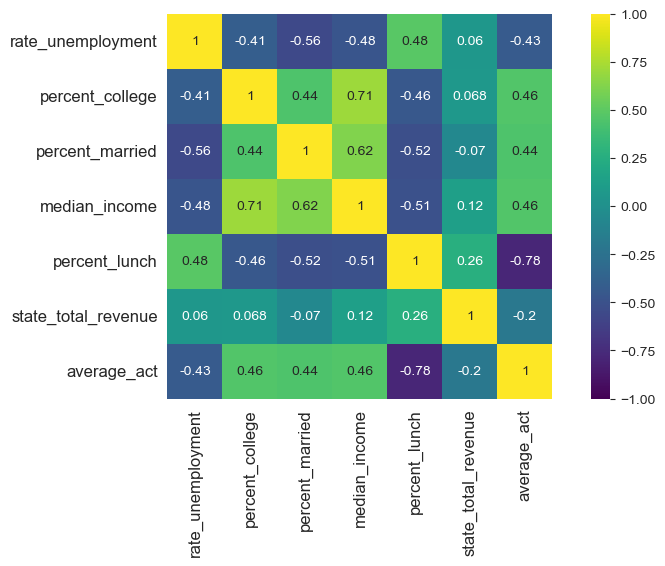

In [49]:
predictor_variables = ['rate_unemployment', 'percent_college', 'percent_married', 'median_income', 'percent_lunch', 'state', 'charter', 'state_total_revenue']

numerical_predictors = df[predictor_variables].select_dtypes(include = ['number']).columns.to_list()

corr_matrix = df[numerical_predictors + ['average_act']].corr()

plt.figure(figsize = (10, 5))

sns.heatmap(
    corr_matrix, vmax = 1, vmin = -1, square = True, annot = True, cmap = 'viridis'
)

plt.tick_params(labelsize=12)

plt.show()

The correlation heatmap shows that average ACT scores are most strongly related to socioeconomic factors. Percent_lunch has a strong negative correlation (–0.78), indicating that higher poverty levels correspond to lower ACT performance. Median_income, percent_college, and percent_married each show moderate positive correlations (around 0.44–0.46), meaning that higher income, education, and family stability are linked to higher ACT scores. Rate_unemployment is moderately negative (–0.43), suggesting that economic hardship may lower academic outcomes. In contrast, state_total_revenue has only a weak correlation (–0.20), indicating that total state revenue alone is not a strong predictor of ACT performance.

Make pair plots to explore relationships between the variables

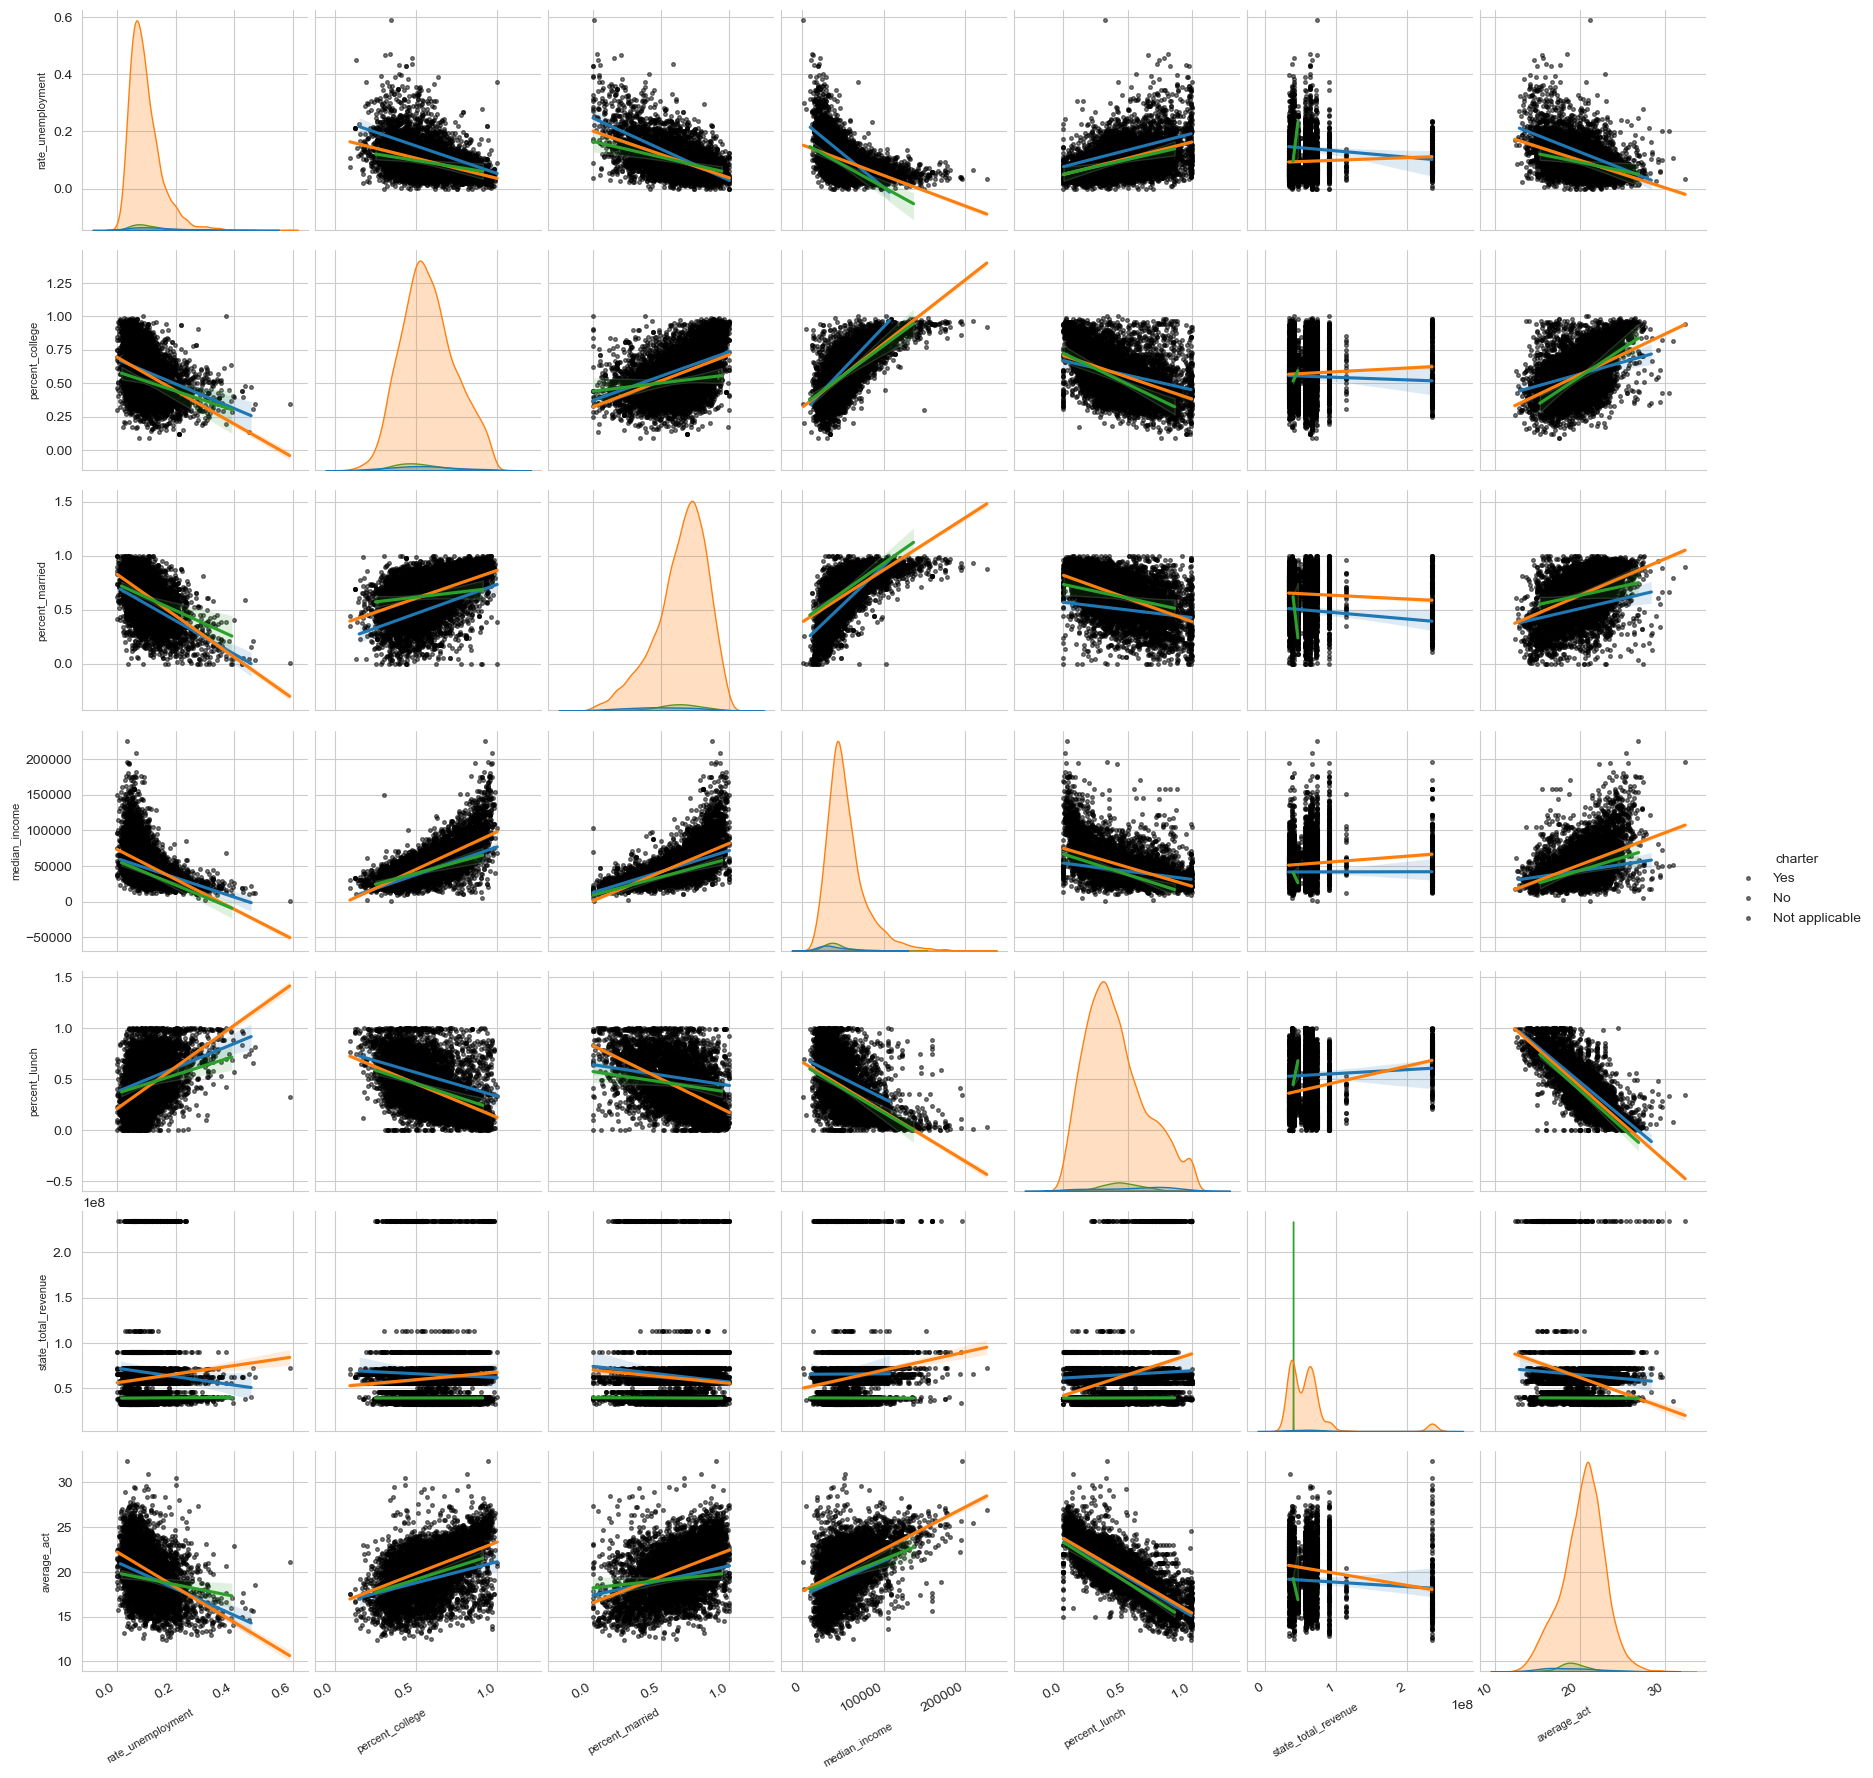

In [50]:
fig = sns.pairplot(
    data = df,
    vars = numerical_predictors + ['average_act'],
    hue = 'charter',
    kind= 'reg',
    plot_kws={'scatter_kws': {'alpha': 0.5, 'color': 'k', 's': 7},
              },
)


for ax in fig.axes.flat:
    if ax.get_xlabel() == 'CT Median Household Income':
        ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0)) #apply scientific notation to x-axis only for Median Household Income
    ax.set_xlabel(ax.get_xlabel(), fontsize=8, rotation = 30, ha = 'right')
    ax.set_ylabel(ax.get_ylabel(), fontsize=8)

    # Rotate x-axis tick labels
    plt.setp(ax.get_xticklabels(), rotation = 30, ha = 'right')

plt.show()

The pair plots show consistent relationships between socioeconomic variables and average ACT scores. Percent_lunch again shows a strong negative relationship with ACT, meaning that as the percentage of students receiving free or reduced lunch increases, ACT performance declines. Median_income, percent_college, and percent_married display clear positive trends, reinforcing that higher income, education, and family stability contribute to higher ACT scores. Rate_unemployment shows a negative association with ACT outcomes, suggesting that economic distress correlates with weaker academic results. Meanwhile, state_total_revenue shows no clear linear pattern with ACT scores, confirming it is not a reliable predictor of student performance.

# Identify outliers

Identifying outliers within each predictor variables

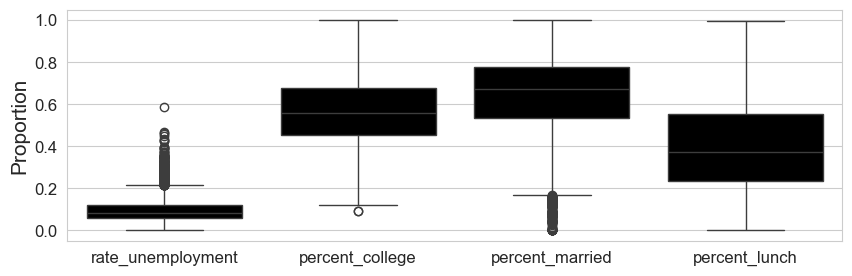

In [51]:
plt.figure(figsize = (10, 3))

fractions = list(numerical_predictors)
fractions.remove('median_income')
fractions.remove('state_total_revenue')

sns.boxplot(data = df[fractions], color = 'k')

plt.ylabel('Proportion', fontsize=15)

plt.tick_params(labelsize=12)

plt.show()

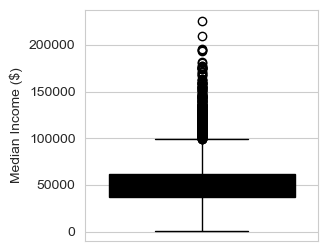

In [52]:
plt.figure(figsize = (3,3)
           )
sns.boxplot(data = df['median_income'], color = 'k')

plt.ylabel('Median Income ($)')

plt.show()


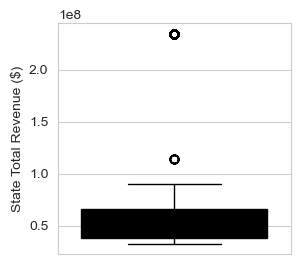

In [53]:
plt.figure(figsize = (3,3))
sns.boxplot(data = df['state_total_revenue'], color = 'k')

plt.ylabel('State Total Revenue ($)')

plt.show()

# Modeling

## Single input models

Fit and assess models predicting the average ACT score from the median income variable

Creates a scatter plot with a regression line to visualize the relationship between median household income and average ACT scores

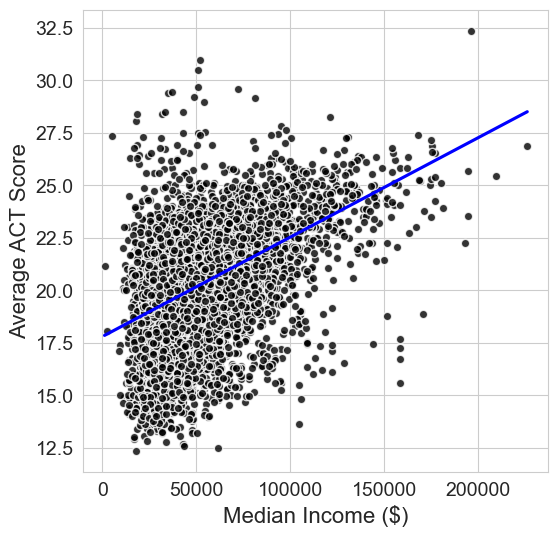

In [54]:
plt.figure(figsize = (6,6))

sns.regplot(data = df,
           x = 'median_income',
           y = 'average_act',
           color = 'blue',
           ci=False,
           scatter_kws = {'color': 'black', 'edgecolors': 'white', 'linewidths': 1})

# Add axis labels
plt.xlabel('Median Income ($)', fontsize=16)
plt.ylabel('Average ACT Score', fontsize=16)

plt.tick_params(labelsize=14)

plt.show()

The plot shows a positive relationship between median income and ACT scores. Schools in areas with higher household income tend to have higher average ACT results. While the data show some variation, the upward trend suggests that income level is a factor influencing academic performance.

### Fit the simple linear regression model

In [55]:
model_median_income = smf.ols(formula= 'average_act ~ median_income', data = df).fit()

In [56]:
print(model_median_income.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     1934.
Date:                Sun, 19 Oct 2025   Prob (F-statistic):               0.00
Time:                        21:37:56   Log-Likelihood:                -16043.
No. Observations:                7227   AIC:                         3.209e+04
Df Residuals:                    7225   BIC:                         3.210e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        17.8026      0.063    284.794

The model results show an R-squared of about 0.21, which means income explains roughly 21% of the differences in ACT scores across schools. The coefficient for median income is positive, showing that ACT scores tend to increase as income increases. The p-value is zero, meaning this relationship is statistically significant.

### Numerical assessment of fit accuracy

compute the R-squared

In [57]:
model_median_income.rsquared

np.float64(0.2111864897930108)

compute the RMSE (root mean squared error)

In [58]:
y_hat = model_median_income.predict()

In [59]:
np.sqrt(mean_squared_error(df['average_act'], y_hat)).round(3)

np.float64(2.228)

The RMSE is about 2.23, meaning that on average, the model’s predictions are off by around 2 ACT points.

Compute the mean absolute error

In [60]:
mean_absolute_error(df['average_act'], y_hat)

1.712938698068855

The mean absolute error is about 1.71,  which means the model’s predicted ACT scores differ from the actual scores by about 1.7 points on average.

Use a residual plot for graphical assessment of model fit

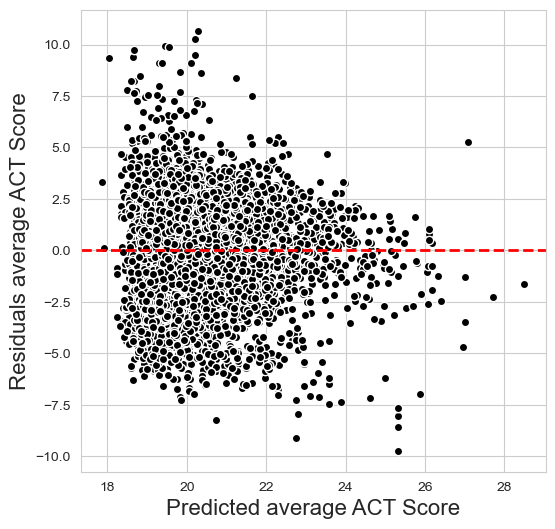

In [61]:
plt.figure(figsize = (6,6))

plt.plot(y_hat, model_median_income.resid, 'ko', mec='w')
plt.axhline(0, color = 'r', linestyle='dashed', lw=2)

plt.xlabel('Predicted average ACT Score', fontsize=16)
plt.ylabel('Residuals average ACT Score', fontsize=16)

plt.tick_params

plt.show()

The plot shows a clear pattern and uneven spread, especially at lower predicted values. The model doesn’t explain much of the variation in ACT scores, median income alone is not enough to reliably predict ACT performance.

Trying a quadratic model. Comparing the simple linear model with a quadratic model to see whether adding a nonlinear term improves how well income predicts ACT scores

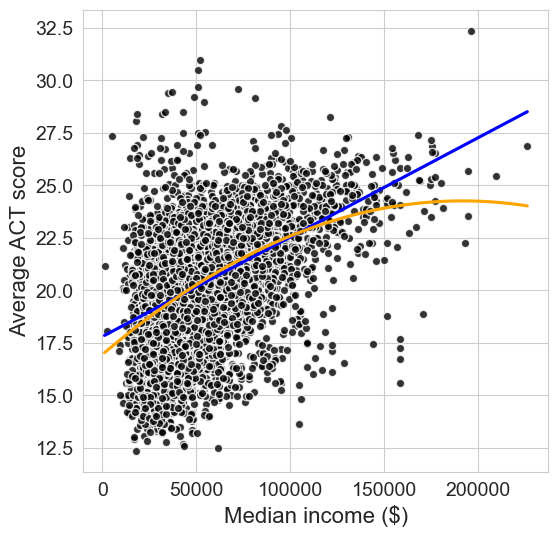

In [62]:
plt.figure(figsize=(6, 6))

sns. regplot(data=df,
            x= 'median_income',
            y='average_act',
            color='blue',
            ci=False,
            scatter_kws={'color': 'black', 'edgecolors': 'white', 'linewidths' : 1})

sns. regplot(data=df,
            x='median_income',
            y='average_act',
            order=2,
            color='orange',
            ci=False,
            scatter=False)

# Add axis labels
plt.xlabel('Median income ($)', fontsize=16)
plt.ylabel('Average ACT score', fontsize=16)

plt.tick_params(labelsize=14)

plt.show()

While both lines show a slight upward trend, the overall relationship between income and ACT scores isn’t very strong. The data points are widely scattered, and the quadratic curve flattens at higher income levels, suggesting that income alone doesn’t predict student performance. Schools in wealthier areas don’t always have higher ACT scores, which means other factors also play a role in student's academic performence.

Fitting a quadratic linear regression model

In [63]:
model_median_income2 = smf.ols(
    formula= 'average_act ~ median_income + I(median_income ** 2)', 
    data = df).fit()

In [64]:
print(model_median_income2.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.219
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     1013.
Date:                Sun, 19 Oct 2025   Prob (F-statistic):               0.00
Time:                        21:37:57   Log-Likelihood:                -16007.
No. Observations:                7227   AIC:                         3.202e+04
Df Residuals:                    7224   BIC:                         3.204e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                16.94

The R-squared value is 0.219, which is nearly identical to the linear model’s 0.211. ACT scores tend to rise with income up to a point, then level off. Since there's not much improvement in model fit, the quadratic model doesn’t reveal a much stronger relationship, income still isn’t a strong predictor of ACT scores overall.

### Assess the model significance

In [65]:
model_median_income2.pvalues

Intercept                0.000000e+00
median_income            2.631899e-99
I(median_income ** 2)    1.395848e-17
dtype: float64

In [66]:
anova_lm(model_median_income, model_median_income2)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,7225.0,35865.012794,0.0,NaN,NaN,NaN
1,7224.0,35505.105960,1.0,359.906834,73.227974,1.395848e-17


The ANOVA test gives a very low p-value, showing that the quadratic model fits the data slightly better than the linear one. However, the improvement is minimal.

### Assess the model accuracy

Compute the mean absolute error

In [67]:
mean_absolute_error(df['average_act'], model_median_income.predict())



1.712938698068855

In [68]:
mean_absolute_error(df['average_act'], model_median_income2.predict())

1.6972389257635734

Both models perform almost the same, and income alone remains a weak predictor of ACT performance.

# Multiple linear regression

Fit the multiple linear regression using all socioeconomic variables as predictors

In [69]:
model = smf.ols(
    formula = 'average_act ~ rate_unemployment + percent_college + percent_married + median_income + percent_lunch + state_total_revenue',
    data = df).fit()

In [70]:
print(model.summary()  )

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     2036.
Date:                Sun, 19 Oct 2025   Prob (F-statistic):               0.00
Time:                        21:37:57   Log-Likelihood:                -13322.
No. Observations:                7227   AIC:                         2.666e+04
Df Residuals:                    7220   BIC:                         2.671e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              22.7120    

This multiple linear regressio model has a R-squared value of 0.628, which is a strong improvement compared to earlier single variable models. Among the predictors, the percentage of adults with college degrees shows a positive relationship with ACT performance, meaning schools in more educated areas tend to perform better. On the other hand, both the unemployment rate and the percentage of students receiving free or reduced lunch have negative effects, suggesting that economic hardship is linked to lower scores. Median income and the percentage of married couples do not appear to be significant once other factors are considered. Interestingly, state total revenue has a small but negative effect, indicating that spending more money at the state level doesn’t necessarily translate to higher academic performance.

### Use a residual plot for graphical assessment of model fit

In [71]:
y_hat = model.predict()

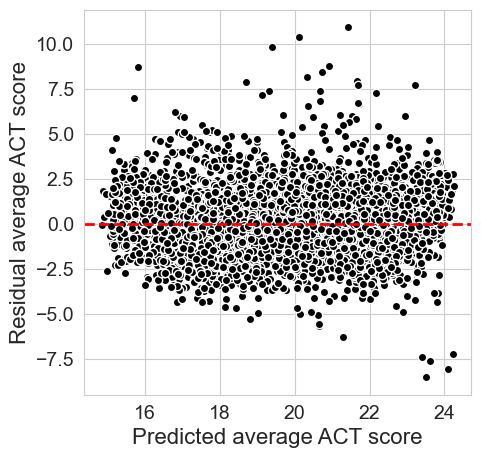

In [72]:
plt.figure(figsize= (5, 5))
plt.plot(y_hat, model.resid, 'ko', mec='w')
plt.axhline(0, color='r', linestyle='dashed', lw=2)
plt.xlabel('Predicted average ACT score', fontsize=16)
plt.ylabel('Residual average ACT score', fontsize=16)
plt.tick_params(labelsize=14)
plt.show()

The residuals are somewhat evenly scattered around the red dashed line at zero, suggesting it does a better job capturing the variation in ACT scores than the single-variable model.

### Compute the mean absolute error

In [73]:
mean_absolute_error(df['average_act'], model.predict())

1.142873449935832

The model has a mean absolute error of about 1.15, meaning that the model’s predictions differ from the real ACT scores by about one point on average. It's improved compared to the earlier single-variable models, showing that including multiple socioeconomic factors makes the predictions more accurate and reliable.

# Fit a reduced model with the significant predictors

In [74]:
model_reduced = smf.ols(
    formula='average_act ~ rate_unemployment + percent_college + percent_lunch + state_total_revenue',
    data=df).fit()

In [75]:
print(model_reduced.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     3054.
Date:                Sun, 19 Oct 2025   Prob (F-statistic):               0.00
Time:                        21:37:57   Log-Likelihood:                -13323.
No. Observations:                7227   AIC:                         2.666e+04
Df Residuals:                    7222   BIC:                         2.669e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              22.6467    

This reduced regression model keeps only the predictors that were statistically significant in the full model. The results show an R-squared of 0.628, which is the same as the full model, meaning the simplified version explains just as much of the variation in ACT scores. All remaining predictors are highly significant. The coefficients show that higher unemployment and higher rates of free or reduced lunch are linked to lower ACT scores, while a higher percentage of college-educated adults is associated with higher scores. The small negative effect of state total revenue suggests that funding alone doesn’t necessarily lead to better student performance

Use a rediucal plot for graphical assessment of model fit

In [76]:
y_hat = model_reduced.predict()

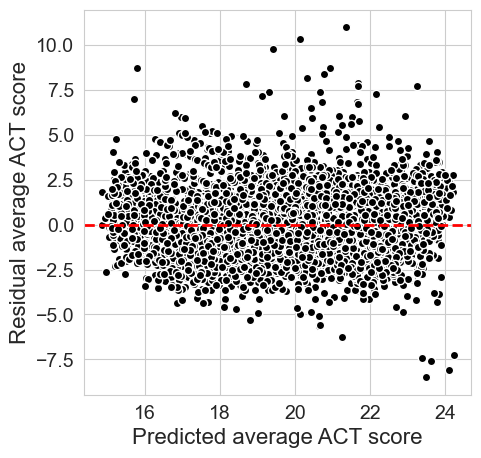

In [77]:
plt.figure(figsize= (5, 5))

plt.plot(y_hat, model_reduced.resid, 'ko', mec='w')
plt.axhline(0, color='r', linestyle='dashed', lw=2)

plt.xlabel('Predicted average ACT score', fontsize=16)
plt.ylabel('Residual average ACT score', fontsize=16)

plt.tick_params(labelsize=14)
plt.show()

The residuals are evenly scattered around zero with no clear pattern, indicating that the reduced model fits the data well, similar to the full model.

Compare accuracy between full and reduced models

In [79]:
mae_full = mean_absolute_error(df ['average_act'], model.predict())
mae_reduced = mean_absolute_error (df ['average_act'], model_reduced.predict ( ))

r2_full = model. rsquared
r2_reduced = model_reduced.rsquared

pd.DataFrame({'Mean Absolute Error': [mae_full, mae_reduced],
              'R-squared': [r2_full, r2_reduced]},
             index=['full model', 'reduced model']).round(4)

,Mean Absolute Error,R-squared
full model,1.1429,0.6285
reduced model,1.1429,0.6284


Both the full and reduced models have nearly identical results, with a Mean Absolute Error of about 1.14 and an R-squared around 0.63. This means removing the nonsignificant variables didn’t affect accuracy, so the reduced model performs just as well while being simpler and easier to interpret.

# Scaling 

### scale the predictor variables in the reduced model to have mean 0 and std 1 and add them to the data

In [87]:
predictor_variables = ['rate_unemployment', 'percent_college', 'percent_lunch', 'state_total_revenue']

In [88]:
scaled_columns = [var + '_normalized' for var in predictor_variables]
print(scaled_columns)

['rate_unemployment_normalized', 'percent_college_normalized', 'percent_lunch_normalized', 'state_total_revenue_normalized']


In [89]:
scaler = StandardScaler().fit(df[predictor_variables])

In [90]:
df[scaled_columns] = scaler.transform(df[predictor_variables])

check the mean and std of the transformed data

In [91]:
df[scaled_columns].agg(['mean', 'std']).round(3)

,rate_unemployment_normalized,percent_college_normalized,percent_lunch_normalized,state_total_revenue_normalized
mean,-0.0,-0.0,0.0,0.0
std,1.0,1.0,1.0,1.0


### Fit the multiple linear regression model with the normalized predictors

In [98]:
model_normalized = smf.ols(
    formula = 'average_act ~ rate_unemployment_normalized + percent_college_normalized + percent_lunch_normalized + state_total_revenue_normalized ', 
    data = df).fit()

In [99]:
print(model_normalized.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     3054.
Date:                Sun, 19 Oct 2025   Prob (F-statistic):               0.00
Time:                        21:49:20   Log-Likelihood:                -13323.
No. Observations:                7227   AIC:                         2.666e+04
Df Residuals:                    7222   BIC:                         2.669e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

After normalization, the regression coefficients show that percent_college has the strongest positive influence on ACT scores, while percent_lunch has the strongest negative effect. The R-squared remains about 0.63.